<a href="https://colab.research.google.com/github/zfturan/dishwasher-production-data-analysis/blob/main/predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("/content/predictive_maintenance.csv")
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
missing = df.isnull().mean().sort_values(ascending=False)
missing


,0
UDI,0.0
Product ID,0.0
Type,0.0
Air temperature [K],0.0
Process temperature [K],0.0
Rotational speed [rpm],0.0
Torque [Nm],0.0
Tool wear [min],0.0
Target,0.0
Failure Type,0.0


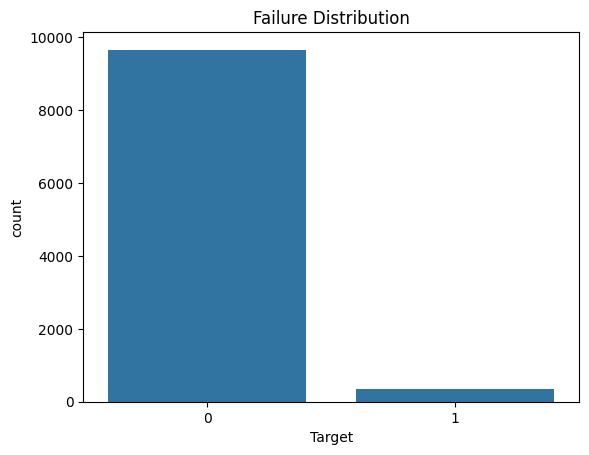

In [5]:
sns.countplot(data=df, x='Target')
plt.title("Failure Distribution")
plt.show()


In [6]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column: {col}, Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head())
    print("-"*40)



Column: Product ID, Unique values: 10000
Product ID
L57163    1
M24842    1
L57161    1
L57160    1
L57159    1
Name: count, dtype: int64
----------------------------------------
Column: Type, Unique values: 3
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
----------------------------------------
Column: Failure Type, Unique values: 6
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: count, dtype: int64
----------------------------------------


In [7]:
df.describe()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


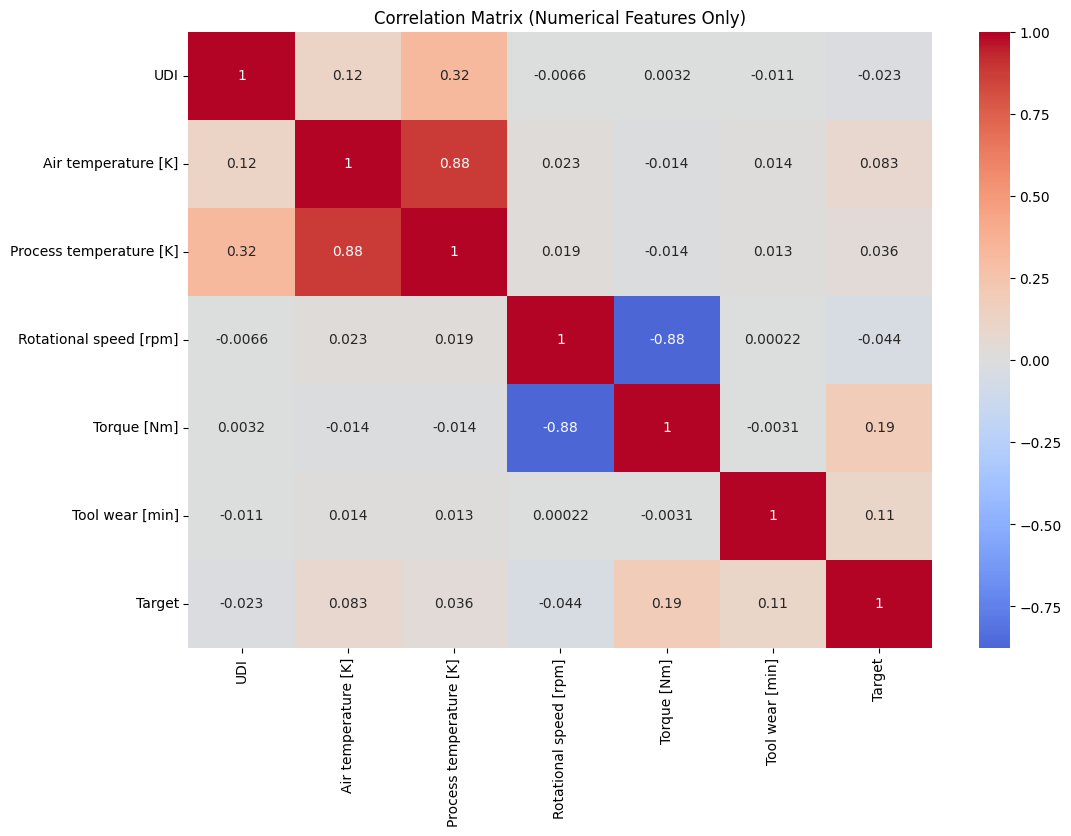

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, center=0)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()


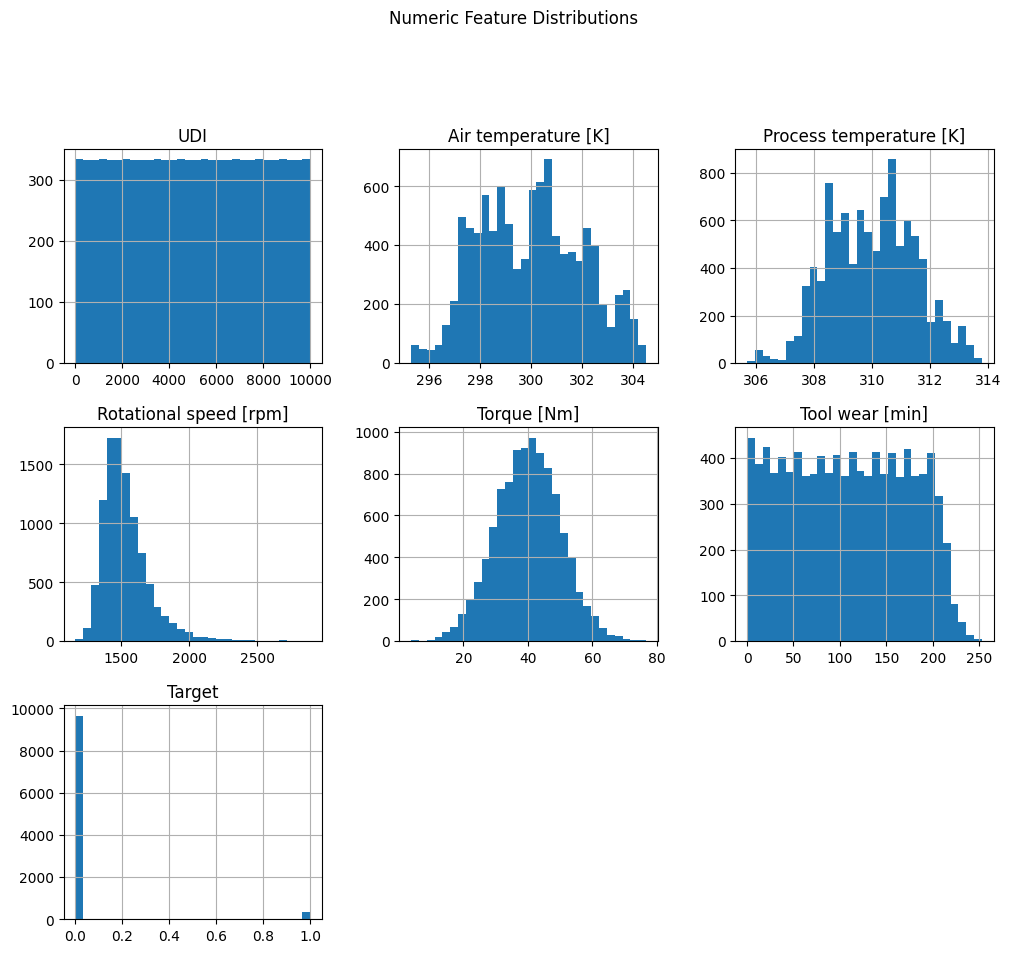

In [9]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.show()


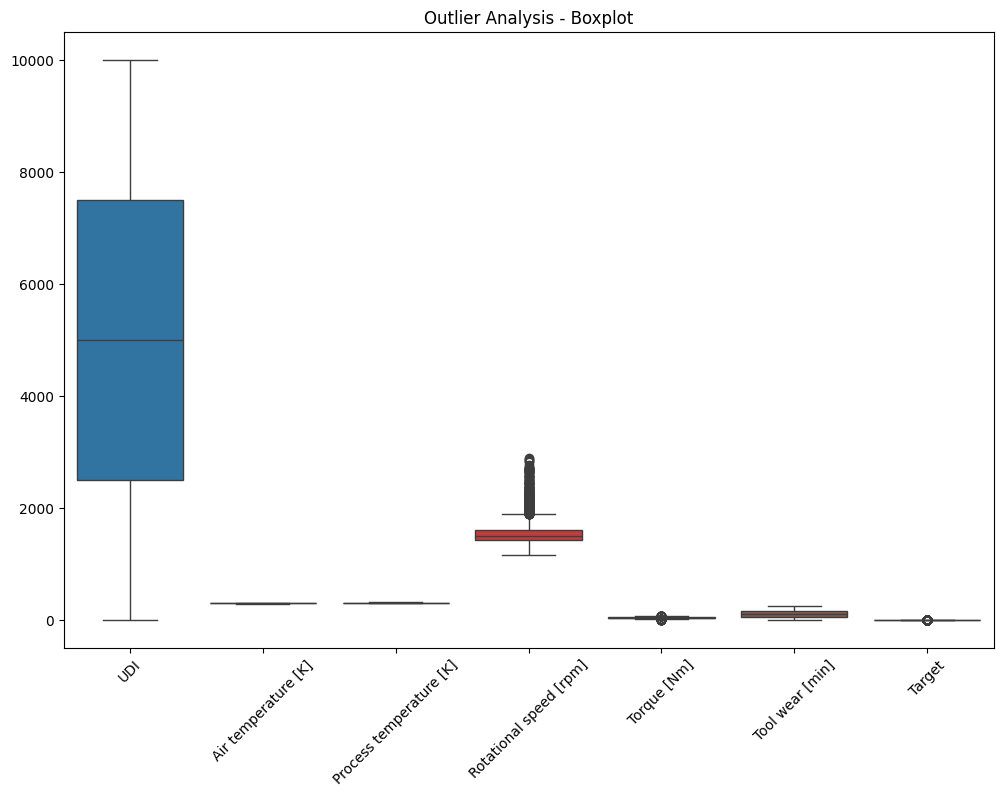

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Outlier Analysis - Boxplot")
plt.show()


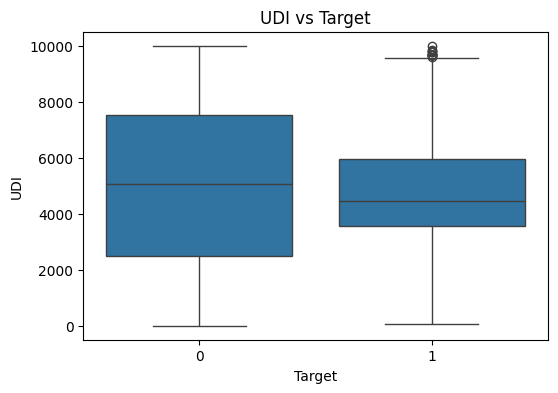

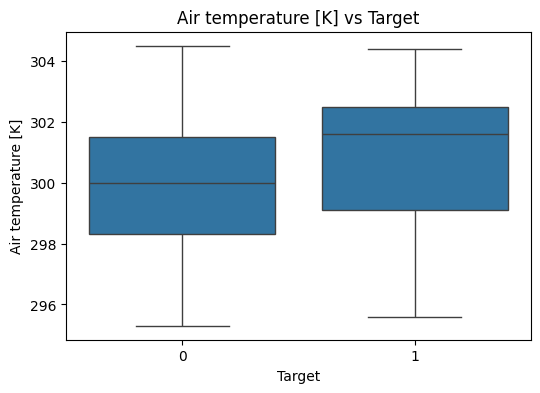

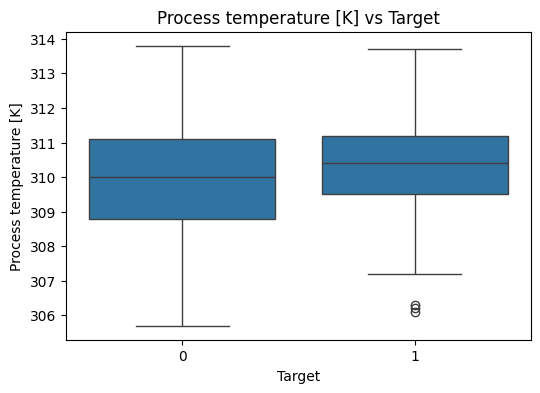

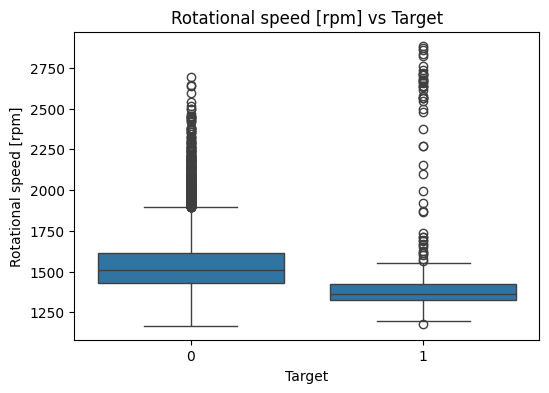

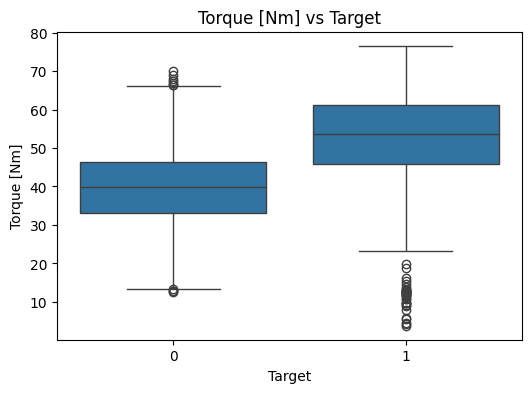

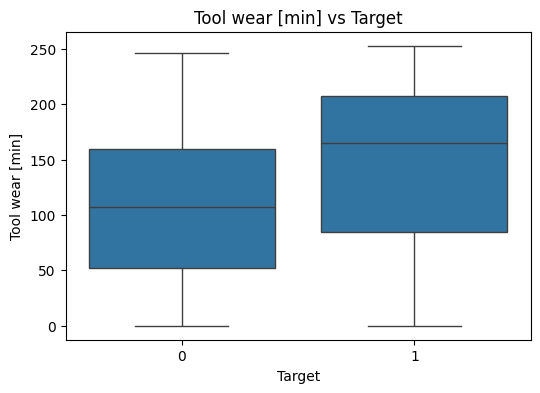

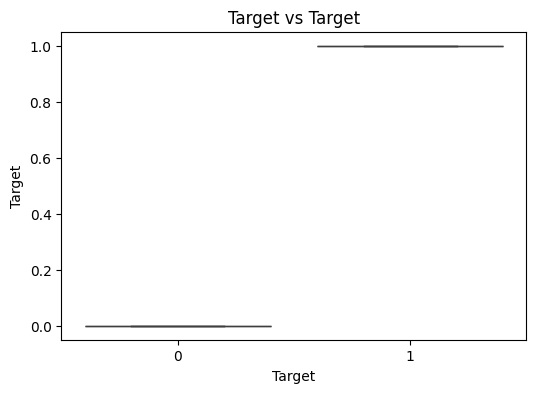

In [11]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Target', y=col, data=df)
    plt.title(f"{col} vs Target")
    plt.show()
